#Instalacion librerias


In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm chembl_webresource_client git+https://github.com/ikmckenz/adme-pred-py.git

  Cloning https://github.com/ikmckenz/adme-pred-py.git to /tmp/pip-req-build-uincqtl0
  Running command git clone --filter=blob:none --quiet https://github.com/ikmckenz/adme-pred-py.git /tmp/pip-req-build-uincqtl0
  Resolved https://github.com/ikmckenz/adme-pred-py.git to commit 8091a02fe5998b8ba237760ade7ff3400abbbcdd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.2 MB/s eta 0:00:00
  Created wheel for adme-pred: filename=adme_pred-0.0.2-py3-none-any.whl size=18561 sha256=00c8f47012ad04de426db5f4bff7d3f8c20d37e5780eed68547732a11b803448
  Stored in directory: /tmp/pip-ephem-wheel-cache-8wa85sxh/wheels/0b/cd/8f/5b6314f4393bde6a8e1378ff709adf4c3a59e4ee2f4ef88256
Successfully built adme-pred
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninst

In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm useful_rdkit_utils seaborn scikit-posthocs chembl_downloader chembl_webresource_client  pubchempy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=7b29e37f6eb42af20a62c4e7a698a740bd14b2e5e1d3a015bd852144e8ee8e9e
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


In [ ]:
#guardar eeto


#Importacion

In [ ]:
import os

# Importar libreria para guardar trabajar con tablas
import pandas as pd
import numpy as np

# Importar las librerias de RDKit
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns

# Importar las funciones de 'scipy'
from scipy.cluster.hierarchy import dendrogram, linkage, is_valid_linkage, cut_tree

# Importar las funciones de 'sklearn'
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Importar libreria de ChEMBL
from chembl_webresource_client.new_client import new_client

# Importar libreria de PubChem
import pubchempy as pcp

# Importar libreria para ver una barra con el progreso de cada comando
from tqdm.auto import tqdm
tqdm.pandas()

# Importar el módulo de advertencias
import warnings

# Importar el módulo sys
import sys
np.set_printoptions(threshold=sys.maxsize)


from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols


# Importar libreria de RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

# Importar libreria para cambiar el directorio y guardar archivos
import os

# Importar libreria para ver una barra con el progreso de cada comando
from tqdm.auto import tqdm
tqdm.pandas()

import pandas as pd

from chembl_webresource_client.new_client import new_client

# Importar libreria de ADME
from adme_pred import ADME

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Active","Inactive"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

%matplotlib inline

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

#Google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Indicar la carpeta de trabajo
#path_luz = '/content/drive/MyDrive/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos'
path_luz = "/content/drive/MyDrive/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos/Activos_contra_Lys"
path_mer = '/content/drive/Shareddrives/Doctorado/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos/Activos_contra_Lys'
os.chdir(path_luz)

#Modelo

In [ ]:
total=pd.read_csv("Resultados_compuestos_lys_800.csv") #These data was taken from ChEMBL where we created a library
                                                       #of 17,946 bioactive compounds with the funcional groupe chromane scaffold
                                                       #around 800 presented accurate information about their activity against T. Cruzi

In [ ]:
total


,Unnamed: 0,level_0,index,canonical_smiles,ROMol,InchiKey,Activity,Organismo,assay_chembl_id,type,Activity_metric
0,0,0,0,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,<rdkit.Chem.rdchem.Mol object at 0x78cde710a6c0>,QQWUGDVOUVUTOY-UHFFFAOYSA-N,Active,Human,CHEMBL1006347,IC50,low
1,1,1,1,Cc1ccc(NC(=O)c2cccc(C(F)(F)F)c2)cc1N1Cc2cnc(N)...,<rdkit.Chem.rdchem.Mol object at 0x78cde710a960>,ZWVLMQTXUWMUII-UHFFFAOYSA-N,Active,Human,CHEMBL974011,EC50,low
2,2,4,4,CN(C)c1ccc(-c2cc3ncccc3c(NCCCCN)n2)cc1,<rdkit.Chem.rdchem.Mol object at 0x78cde710a490>,SBGMPUIVPOGTGN-UHFFFAOYSA-N,Active,Human,CHEMBL1025770,IC50,high
3,3,5,5,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,<rdkit.Chem.rdchem.Mol object at 0x78cde710a810>,HKSZLNNOFSGOKW-FYTWVXJKSA-N,Active,Human,CHEMBL981176,IC50,high
4,4,6,6,COc1cc(Nc2nc(N[C@H]3CCCC[C@H]3N)n3nc(-c4ccccc4...,<rdkit.Chem.rdchem.Mol object at 0x78cde7109e00>,VLHKHLQNVJKAHG-UXHICEINSA-N,Active,Human,CHEMBL981176,IC50,high
...,...,...,...,...,...,...,...,...,...,...,...
855,855,870,395,COc1ccc(Nc2nc(N/N=C/c3ccc(O)cc3)nc(Nc3ccc([N+]...,<rdkit.Chem.rdchem.Mol object at 0x78cde7711d90>,PPSIRBXGBCWYRP-ZVHZXABRSA-N,Inactive,Plasmodium,CHEMBL3301569,IC50,NaN
856,856,871,396,Cn1c(C(=O)c2cccc3ccccc23)nc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x78cde7711e00>,IRYFDSQLAQPRJR-UHFFFAOYSA-N,Inactive,Plasmodium,CHEMBL3301569,IC50,NaN
857,857,872,397,CCc1ccc(CNCC(O)c2ccccc2)cc1.Cl,<rdkit.Chem.rdchem.Mol object at 0x78cde7711e70>,CPIYNGWBBRUNGH-UHFFFAOYSA-N,Inactive,Plasmodium,CHEMBL3301569,IC50,NaN
858,858,873,398,OCCNc1nc(Nc2ccc(Cl)c(Cl)c2)nc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x78cde7711ee0>,ZGMMVVYGDFQTBB-UHFFFAOYSA-N,Inactive,Plasmodium,CHEMBL3301569,IC50,NaN


In [ ]:
total["Activity_metric"]=total["Activity_metric"].fillna("I")

In [ ]:
total["Activity"].value_counts()

Inactive    784
Active       76
Name: Activity, dtype: int64

In [ ]:
len(total)

860

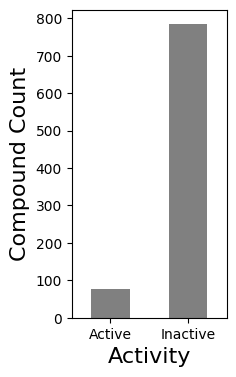

In [ ]:
plt.figure(figsize=(2, 4))

sns.countplot(data=total, x="Activity", color="grey",width=0.5)

#modify individual font size of elements
plt.xlabel('Activity', fontsize=16);
plt.ylabel('Compound Count', fontsize=16);

In [ ]:
train_df, test_df = train_test_split(total, test_size=0.2, random_state=42, stratify=total[["Activity_metric"]])

In [ ]:
train_df.Activity_metric.value_counts() #The activity metric was divided in 3 different levels of effectivity

I       627
high     42
low      19
Name: Activity_metric, dtype: int64

In [ ]:
test_df.Activity_metric.value_counts()

I       157
high     10
low       5
Name: Activity_metric, dtype: int64

#GRID SEARCH

### training descriptors

In [ ]:
# filtrar SMILES que no den error
SMILES = []
for i in range(len(train_df['canonical_smiles'])):   #Every compund can be analized and detected with their "smiles"
  try:
    cs = Chem.CanonSmiles(train_df['canonical_smiles'].iloc[i])
    SMILES.append(cs)
  except:
    print('Invalid SMILES:',train_df['canonical_smiles'].iloc[i],i)

In [ ]:
# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]  # Chlorine
F=[]   #fluroine
Br=[]  #bromine
I=[]   #iodine

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# saturated ring
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Counting 5 carbon rings
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Counting 6 carbon rings
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptors = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity= train_df["Activity"].tolist()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Activity = lb.fit_transform(Activity)
#clusters = total["Cluster_PCA_5"].tolist()
#descriptors["Cluster_PCA_5"]= clusters

In [ ]:
 # validation groups
X = np.array(descriptors)
y = np.array(Activity)

In [ ]:
print(len(X))
print(len(y))

688
688


###Testing descriptors

In [ ]:
# filtrar SMILES que no den error
SMILES_test = []
for i in range(len(test_df['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(test_df['canonical_smiles'].iloc[i])
    SMILES_test.append(cs)
  except:
    print('Invalid SMILES:',test_df['canonical_smiles'].iloc[i],i)

In [ ]:
# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES_test]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptors_test = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity_test= test_df["Activity"].tolist()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Activity_test = lb.fit_transform(Activity_test)

In [ ]:
 # Columna que indica los grupos de validación
X_test = np.array(descriptors_test)
y_test = np.array(Activity_test)

In [ ]:
print(len(X_test))
print(len(y_test))

172
172


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier

##without cross validation (to start analizing)

In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate= 0.2,n_estimators=50,max_depth=3, random_state=42)

xgb_model.fit(X, y)

y_xgb_pred = xgb_model.predict(X_test)


XGBoost Metrics:
Accuracy: 0.9534883720930233
Recall: 0.9808917197452229
Precision: 0.9685534591194969
F1-Score: 0.9746835443037974
Confusion Matrix:
 Axes(0.125,0.11;0.62x0.77)
ROC AUC Score: 0.8237791932059448


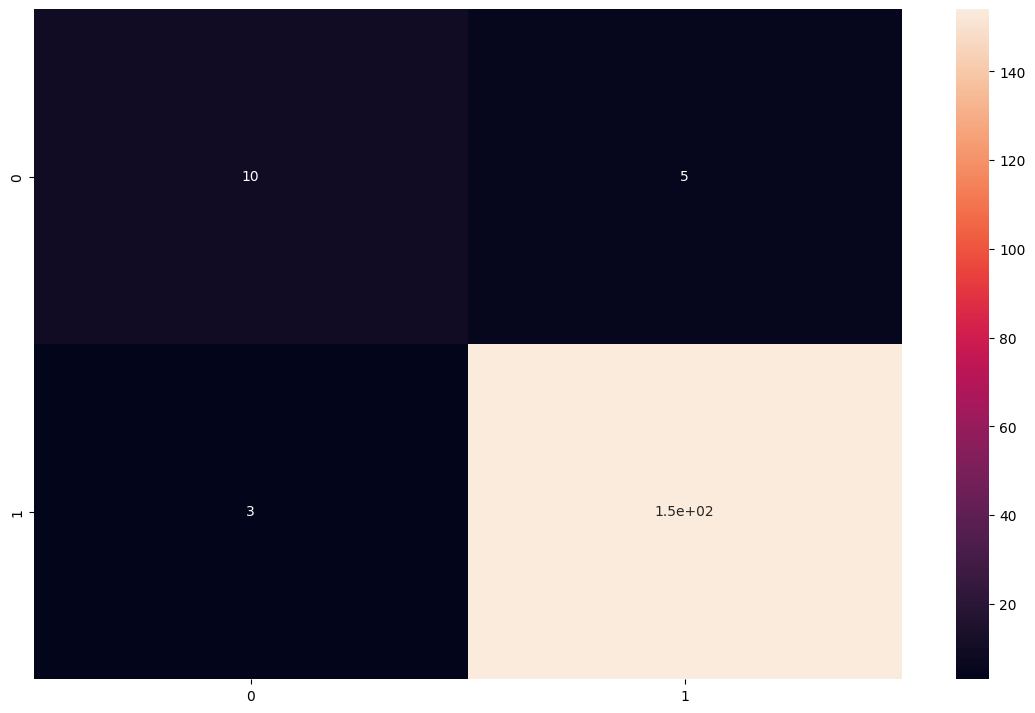

In [ ]:
# Metrics for  XGBoost
accuracy_xgb = accuracy_score(y_test, y_xgb_pred)
recall_xgb = recall_score(y_test, y_xgb_pred)
precision_xgb = precision_score(y_test, y_xgb_pred)
f1_xgb = f1_score(y_test, y_xgb_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_xgb_pred,)
roc_auc_xgb = roc_auc_score(y_test, y_xgb_pred)

# Imprimir métricas para XGBoost
print("XGBoost Metrics:")
print("Accuracy:", accuracy_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)
print("F1-Score:", f1_xgb)
print("Confusion Matrix:\n", sns.heatmap(conf_matrix_xgb,annot=True))
print("ROC AUC Score:", roc_auc_xgb)

In [ ]:
import pickle

filename= "modelo_XGboost_sincross"

#guardar el modelo
#pickle.dump(xgb_model,open(filename,"wb"))  #wb es write binary

modelo_cargado1= pickle.load(open(filename,"rb")) #read binary

In [ ]:
y_pred= modelo_cargado1.predict(X_test)

XGBoost Metrics:
Accuracy: 0.9534883720930233
Recall: 0.9808917197452229
Precision: 0.9685534591194969
F1-Score: 0.9746835443037974
Confusion Matrix:
 Axes(0.125,0.11;0.62x0.77)
ROC AUC Score: 0.8237791932059448


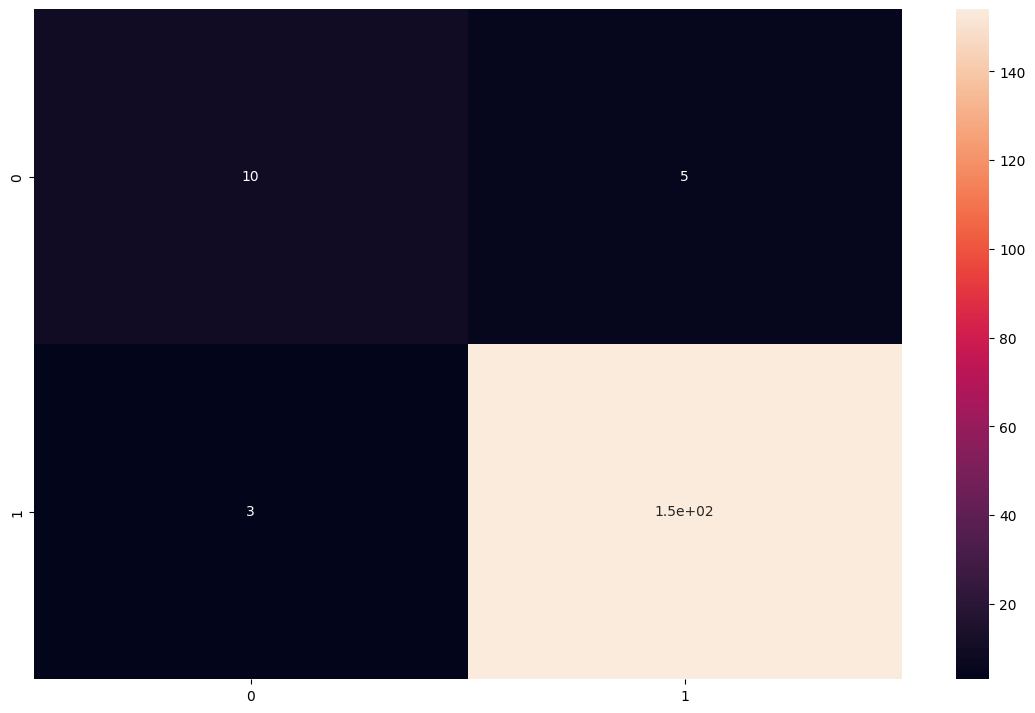

In [ ]:
# Calcular métricas para XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_pred,)
roc_auc_xgb = roc_auc_score(y_test, y_pred)

# Imprimir métricas para XGBoost
print("XGBoost Metrics:")
print("Accuracy:", accuracy_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)
print("F1-Score:", f1_xgb)
print("Confusion Matrix:\n", sns.heatmap(conf_matrix_xgb,annot=True))
print("ROC AUC Score:", roc_auc_xgb)

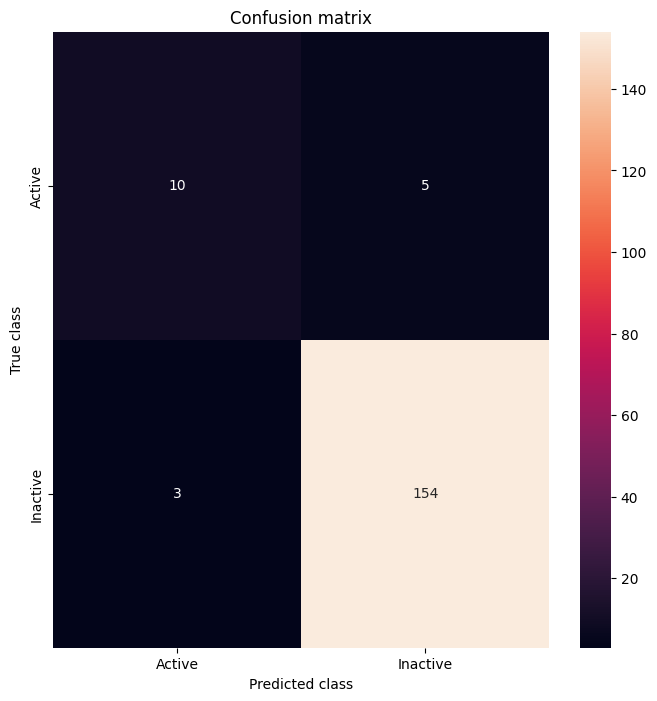

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.97      0.98      0.97       157

    accuracy                           0.95       172
   macro avg       0.87      0.82      0.84       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
mostrar_resultados(y_test, y_xgb_pred)

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [ ]:
y_pred_prob = modelo_cargado1.predict_proba(X_test)[:, 1]

###**roc** curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.9762208067940552

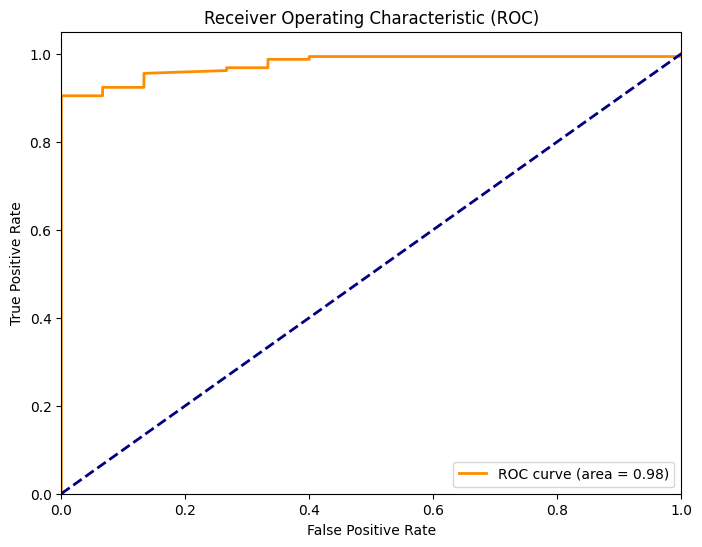

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(fpr)
print(tpr)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.06666667 0.06666667 0.13333333
 0.13333333 0.26666667 0.26666667 0.33333333 0.33333333 0.4
 0.4        1.         1.        ]
[0.         0.00636943 0.2866242  0.29936306 0.38216561 0.40127389
 0.77070064 0.78343949 0.9044586  0.9044586  0.92356688 0.92356688
 0.95541401 0.96178344 0.96815287 0.96815287 0.98726115 0.98726115
 0.99363057 0.99363057 1.        ]


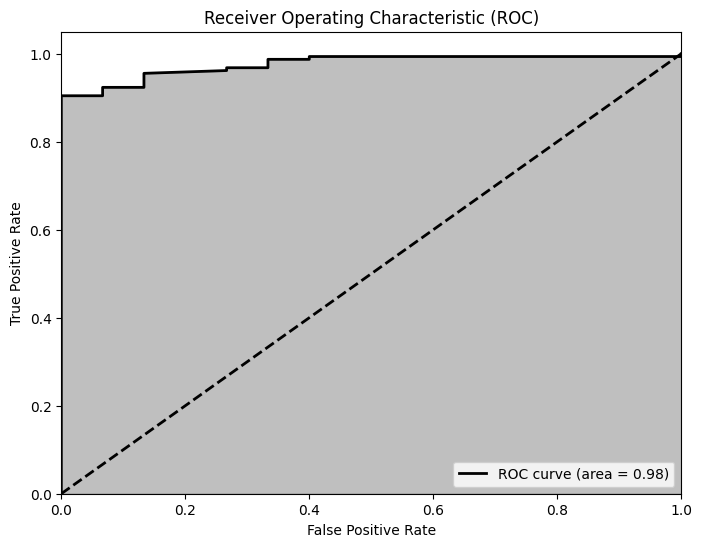

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Supongamos que tienes fpr y tpr calculados previamente, así como roc_auc.

plt.figure(figsize=(8, 6))

# Dibuja la curva ROC
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))

# Rellena el área bajo la curva ROC
plt.fill_between(fpr, tpr, color='grey', alpha=0.5)

# Línea diagonal de referencia
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import trapz

# Limita los valores de FPR al rango de 0 a 0.1
fpr_range = fpr[(fpr >= 0) & (fpr <= 0.1)]
tpr_range = tpr[(fpr >= 0) & (fpr <= 0.1)]

# Calcula el área bajo la curva ROC para el rango especificado
area_partial = trapz(tpr_range, fpr_range)

print("Área parcial bajo la curva ROC:", area_partial)

Área parcial bajo la curva ROC: 0.06029723991507431


In [ ]:
auc_partial = roc_auc_score(y_test, y_pred_prob, max_fpr=1)

print("AUC-ROC para el primer 10% del área bajo la curva ROC:", auc_partial)


AUC-ROC para el primer 10% del área bajo la curva ROC: 0.9762208067940552


In [ ]:
auc_partial = roc_auc_score(y_test, y_pred_prob, max_fpr=0.1)

print("AUC-ROC para el primer 10% del área bajo la curva ROC:", auc_partial)


AUC-ROC para el primer 10% del área bajo la curva ROC: 0.9530673818303721


In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06666667,
       0.06666667, 0.13333333, 0.13333333, 0.26666667, 0.26666667,
       0.33333333, 0.33333333, 0.4       , 0.4       , 1.        ,
       1.        ])

In [ ]:
tpr

array([0.        , 0.00636943, 0.2866242 , 0.29936306, 0.38216561,
       0.40127389, 0.77070064, 0.78343949, 0.9044586 , 0.9044586 ,
       0.92356688, 0.92356688, 0.95541401, 0.96178344, 0.96815287,
       0.96815287, 0.98726115, 0.98726115, 0.99363057, 0.99363057,
       1.        ])

In [ ]:
thresholds

array([1.9997184 , 0.9997185 , 0.9977908 , 0.99774677, 0.9970937 ,
       0.997059  , 0.98657876, 0.9864753 , 0.9274301 , 0.92079955,
       0.89430684, 0.88904923, 0.78148866, 0.7749322 , 0.7621095 ,
       0.7241756 , 0.4222783 , 0.28152138, 0.23065148, 0.03693687,
       0.03444227], dtype=float32)

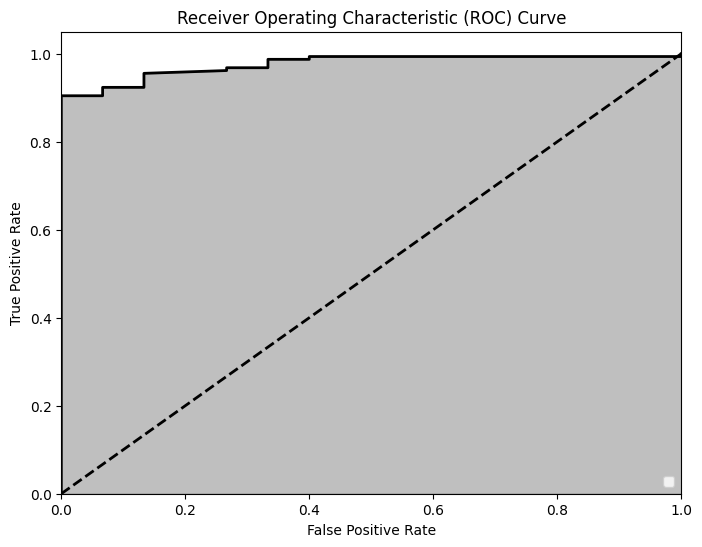

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Supongamos que tienes tus valores de fpr, tpr y thresholds obtenidos previamente
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcula el AUC-ROC completo
roc_auc_full = auc(fpr, tpr)

# Filtra los valores de FPR y TPR en el rango [0, 0.1]
fpr_range = [fpr[i] for i in range(len(fpr)) if fpr[i] >= 0 and fpr[i] <= 0.14]
tpr_range = [tpr[i] for i in range(len(fpr)) if fpr[i] >= 0 and fpr[i] <= 0.14]

# Calcula el AUC-ROC para el primer 10% del área bajo la curva
roc_auc_partial = roc_auc_score(y_test, y_pred_prob, max_fpr=0.1)

# Crea el gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', lw=2)
plt.fill_between(fpr, tpr, color='grey', alpha=0.5)
plt.fill_between(fpr_range, tpr_range, color='grey', alpha=0.0)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()



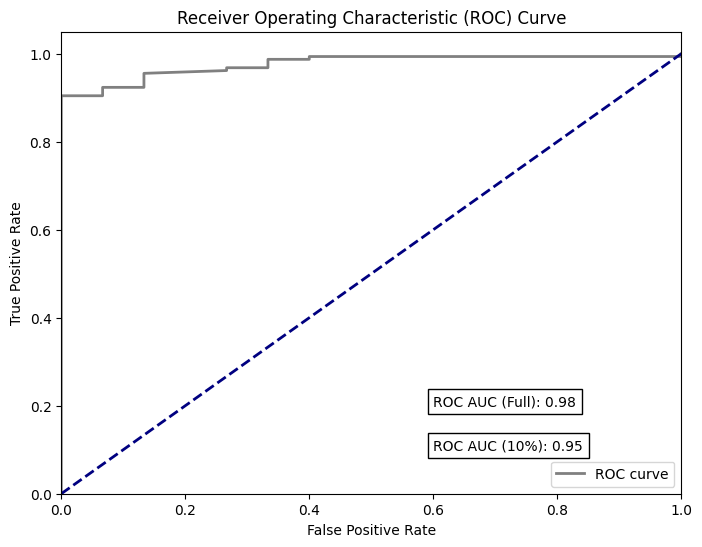

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Supongamos que tienes tus valores de fpr, tpr y thresholds obtenidos previamente
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Crea el gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='gray', lw=2, label='ROC curve')

# Calcula el AUC para FPR máximo de 0.1
roc_auc_partial = roc_auc_score(y_test, y_pred_prob, max_fpr=0.1)

# Agrega el valor de AUC en el gráfico
plt.text(0.6, 0.2, f'ROC AUC (Full): {roc_auc_full:.2f}', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))
plt.text(0.6, 0.1, f'ROC AUC (10%): {roc_auc_partial:.2f}', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

# Resto del código para configurar el gráfico
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

##con cross validation (random)

In [ ]:

# Crear y entrenar un modelo XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model= xgb_model

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=2)

grid_search.fit(X, y)

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
best_model = grid_search.best_estimator_

# Realizar validación cruzada utilizando los grupos definidos
#scores = cross_val_score(best_model, X_train, y_train, groups=grupos_train, cv=5)

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor Accuracy:", best_score)
#for i, score in enumerate(scores):
 #   print(f"Fold {i + 1}: {score:.2f}")



Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Mejor Accuracy: 0.9731227210218807


In [ ]:
# Realizar predicciones con XGBoost
y_xgb_pred = best_model.predict(X_test)

XGBoost Metrics:
Accuracy: 0.9534883720930233
Recall: 0.9808917197452229
Precision: 0.9685534591194969
F1-Score: 0.9746835443037974
Confusion Matrix:
 Axes(0.125,0.11;0.62x0.77)
ROC AUC Score: 0.8237791932059448


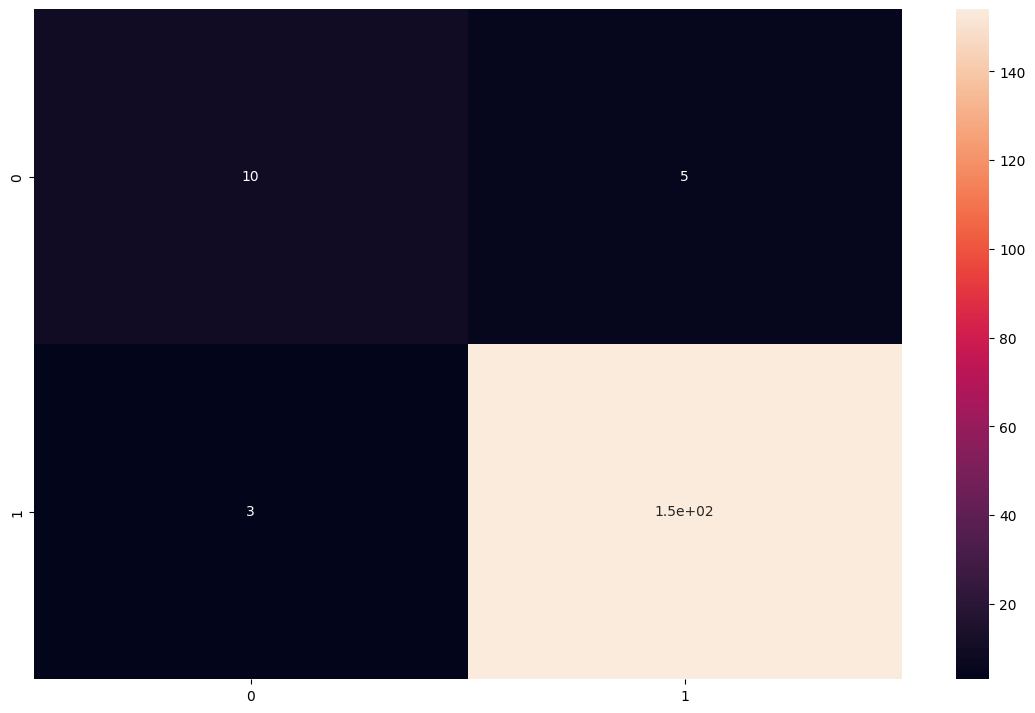

In [ ]:
# Calcular métricas para XGBoost
accuracy_xgb = accuracy_score(y_test, y_xgb_pred)
recall_xgb = recall_score(y_test, y_xgb_pred)
precision_xgb = precision_score(y_test, y_xgb_pred)
f1_xgb = f1_score(y_test, y_xgb_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_xgb_pred)
roc_auc_xgb = roc_auc_score(y_test, y_xgb_pred)

# Imprimir métricas para XGBoost
print("XGBoost Metrics:")
print("Accuracy:", accuracy_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)
print("F1-Score:", f1_xgb)
print("Confusion Matrix:\n", sns.heatmap(conf_matrix_xgb,annot=True))
print("ROC AUC Score:", roc_auc_xgb)

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))


    #mostrar_resultados(y_test, pred_y)

In [ ]:
import pickle

filename= "modelo_XGboost_CV"

#guardar el modelo
pickle.dump(best_model,open(filename,"wb"))  #wb es write binary

modelo_cargado= pickle.load(open(filename,"rb")) #read binary

In [ ]:
y_pred= modelo_cargado.predict(X_test)

In [ ]:
#da todo lo mismo asi que se cargo bien

In [ ]:
# Calcular métricas para XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
roc_auc_xgb = roc_auc_score(y_test, y_pred)

# Imprimir métricas para XGBoost
print("XGBoost Metrics:")
print("Accuracy:", accuracy_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)
print("F1-Score:", f1_xgb)
print("Confusion Matrix:\n", sns.heatmap(conf_matrix_xgb,annot=True))
print("ROC AUC Score:", roc_auc_xgb)

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

##con cross validation por clusters

In [ ]:
# Define tus grupos de validación cruzada utilizando la información de "grupo_validacion"
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear y entrenar un modelo XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model= xgb_model

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=kf)

grid_search.fit(X_train, y_train)

# Realizar validación cruzada utilizando los grupos definidos
scores = cross_val_score(model, X_train, y_train, groups=grupos_train, cv=kf)

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor Accuracy:", best_score)
for i, score in enumerate(scores):
    print(f"Fold {i + 1}: {score:.2f}")

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
best_model = grid_search.best_estimator_


In [ ]:

# Realizar predicciones con XGBoost
y_xgb_pred = best_model.predict(X_test)

In [ ]:
y_xgb_pred

In [ ]:
# Calcular métricas para XGBoost
accuracy_xgb = accuracy_score(y_test, y_xgb_pred)
recall_xgb = recall_score(y_test, y_xgb_pred)
precision_xgb = precision_score(y_test, y_xgb_pred)
f1_xgb = f1_score(y_test, y_xgb_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_xgb_pred)
roc_auc_xgb = roc_auc_score(y_test, y_xgb_pred)

# Imprimir métricas para XGBoost
print("XGBoost Metrics:")
print("Accuracy:", accuracy_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)
print("F1-Score:", f1_xgb)
print("Confusion Matrix:\n", sns.heatmap(conf_matrix_xgb,annot=True))
print("ROC AUC Score:", roc_auc_xgb)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor Accuracy:", best_score)
print("Resultados de validación cruzada:")
for i, score in enumerate(scores):
    print(f"Fold {i + 1}: {score:.2f}")

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
best_model = grid_search.best_estimator_

##Entrenamiento (1) 0,1,2,3 y testeo en 4

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Crear y entrenar un modelo XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Realizar predicciones con XGBoost
y_xgb_pred = xgb_model.predict(X_test)

In [ ]:
# Define tus grupos de validación cruzada utilizando la información de "grupo_validacion"
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear un modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
model = rf_model

# Realizar validación cruzada utilizando los grupos definidos
scores = cross_val_score(model, X_train, y_train, groups=grupos_train, cv=kf)

# Imprimir los resultados de la validación cruzada
print("Resultados de validación cruzada:")
for i, score in enumerate(scores):
    print(f"Fold {i + 1}: {score:.2f}")

# Entrenar el modelo en todo el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
entrenamiento1= pd.concat([cluster0,cluster1,cluster2,cluster3])
testeo1= cluster4

In [ ]:
entrenamiento1["Activity"].value_counts()

In [ ]:
# filtrar SMILES que no den error
SMILES1 = []
for i in range(len(entrenamiento1['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento1['canonical_smiles'].iloc[i])
    SMILES1.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento1['canonical_smiles'].iloc[i],i)

In [ ]:
# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES1]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

Entrenamiento

In [ ]:
entrenamiento1['Activity'] = entrenamiento1['Activity'].map({'Active': 1, 'Inactive': 0})

In [ ]:
descriptors1 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity1= entrenamiento1['Activity']

In [ ]:
from sklearn.model_selection import train_test_split

X1 = np.array(descriptors1)
y1 = np.array(Activity1)


In [ ]:
entrenamiento1.Activity.value_counts()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X1, y1)

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor Accuracy:", best_score)

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
best_model = grid_search.best_estimator_

#print("Mejores hiperparámetros:", migscv.best_params_)
#print("Mejor Accuracy", migscv.best_score_)

#mejor_modelo=migscv.best_estimator_

Testeo

In [ ]:
testeo1["Activity"]=testeo1["Activity"].map({'Active': 1, 'Inactive': 0})


In [ ]:
# filtrar SMILES que no den error
SMILESt = []
for i in range(len(testeo1['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo1['canonical_smiles'].iloc[i])
    SMILESt.append(cs)

  except:
    print('Invalid SMILES:',testeo1['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt= testeo1['Activity']

In [ ]:
Xt = np.array(descriptorst)
yt = np.array(Activityt)

pred_cluster4 = best_model.predict(Xt)

###Resultados 1

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt, pred_cluster4), 3)
precision = round(precision_score(yt,pred_cluster4, average='micro'), 3)
recall = round(recall_score(yt, pred_cluster4, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt,pred_cluster4)

In [ ]:
mostrar_resultados(yt, pred_cluster4)

##Entrenamiento(2) 0,1,2,4 y testeo en 3

In [ ]:
cluster0= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==0]
cluster1= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==1]
cluster2= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==2]
cluster3= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==3]
cluster4= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==4]

In [ ]:
entrenamiento2= pd.concat([cluster0,cluster1,cluster2,cluster4])
testeo2= cluster3



In [ ]:
entrenamiento2["Activity"].value_counts()

In [ ]:
entrenamiento2['Activity'] = entrenamiento2['Activity'].map({'Active': 1, 'Inactive': 0})

In [ ]:
# filtrar SMILES que no den error
SMILES2= []
for i in range(len(entrenamiento2['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento2['canonical_smiles'].iloc[i])
    SMILES2.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento2['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES2]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors2 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity2= entrenamiento2['Activity']

In [ ]:
X2 = np.array(descriptors2)
y2 = np.array(Activity2)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X2, y2)

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor Accuracy:", best_score)

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
best_model2 = grid_search.best_estimator_



Testeo

In [ ]:
testeo2["Activity"]=testeo2["Activity"].map({'Active': 1, 'Inactive': 0})
# filtrar SMILES que no den error
SMILESt2 = []
for i in range(len(testeo2['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo2['canonical_smiles'].iloc[i])
    SMILESt2.append(cs)

  except:
    print('Invalid SMILES:',testeo2['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt2]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst2 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt2= testeo2['Activity']

In [ ]:
Xt2 = np.array(descriptorst2)
yt2 = np.array(Activityt2)

pred_cluster3= best_model2.predict(Xt2)

###Restultados 2

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt2, pred_cluster3), 3)
precision = round(precision_score(yt2,pred_cluster3, average='micro'), 3)
recall = round(recall_score(yt2, pred_cluster3, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt2,pred_cluster3)

In [ ]:
mostrar_resultados(yt2, pred_cluster3)

##Entrenamiento(3) 0,1,3,4 y testeo en 2

In [ ]:
cluster0= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==0]
cluster1= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==1]
cluster2= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==2]
cluster3= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==3]
cluster4= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==4]

In [ ]:
entrenamiento3= pd.concat([cluster0,cluster1,cluster4,cluster3])
testeo3= cluster2

In [ ]:
entrenamiento3["Activity"].value_counts()

In [ ]:
entrenamiento3['Activity'] = entrenamiento3['Activity'].map({'Active': 1, 'Inactive': 0})

In [ ]:
# filtrar SMILES que no den error
SMILES3= []
for i in range(len(entrenamiento3['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento3['canonical_smiles'].iloc[i])
    SMILES3.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento3['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES3]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors3 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity3= entrenamiento3['Activity']

In [ ]:
X3 = np.array(descriptors3)
y3 = np.array(Activity3)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X3, y3)

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor Accuracy:", best_score)

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
best_model3 = grid_search.best_estimator_


Testeo

In [ ]:
testeo3["Activity"]=testeo3["Activity"].map({'Active': 1, 'Inactive': 0})

In [ ]:
# filtrar SMILES que no den error
SMILESt3 = []
for i in range(len(testeo3['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo3['canonical_smiles'].iloc[i])
    SMILESt3.append(cs)

  except:
    print('Invalid SMILES:',testeo3['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt3]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst3 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt3= testeo3['Activity']

In [ ]:
Xt3 = np.array(descriptorst3)
yt3 = np.array(Activityt3)

pred_cluster2= best_model3.predict(Xt3)

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt3,pred_cluster2), 3)
precision = round(precision_score(yt3,pred_cluster2, average='micro'), 3)
recall = round(recall_score(yt3, pred_cluster2, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt3,pred_cluster2)

### Restultados 3

In [ ]:
mostrar_resultados(yt3, pred_cluster2)

##Entrenamiento (4) 0,2,3,4 y testeo en 1

In [ ]:
cluster0= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==0]
cluster1= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==1]
cluster2= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==2]
cluster3= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==3]
cluster4= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==4]

In [ ]:
entrenamiento4= pd.concat([cluster0,cluster4,cluster2,cluster3])
testeo4= cluster1

In [ ]:
entrenamiento4["Activity"].value_counts()

In [ ]:
entrenamiento4['Activity'] = entrenamiento4['Activity'].map({'Active': 1, 'Inactive': 0})

In [ ]:
# filtrar SMILES que no den error
SMILES4= []
for i in range(len(entrenamiento4['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento4['canonical_smiles'].iloc[i])
    SMILES4.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento4['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES4]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors4 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity4= entrenamiento4['Activity']

In [ ]:
X4 = np.array(descriptors4)
y4 = np.array(Activity4)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X4, y4)

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor Accuracy:", best_score)

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
best_model4 = grid_search.best_estimator_


Testeo

In [ ]:
testeo4["Activity"]=testeo4["Activity"].map({'Active': 1, 'Inactive': 0})

In [ ]:
# filtrar SMILES que no den error
SMILESt4 = []
for i in range(len(testeo4['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo4['canonical_smiles'].iloc[i])
    SMILESt4.append(cs)

  except:
    print('Invalid SMILES:',testeo4['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt4]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst4= pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt4= testeo4['Activity']

In [ ]:
Xt4 = np.array(descriptorst4)
yt4 = np.array(Activityt4)

pred_cluster1= best_model4.predict(Xt4)

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt4,pred_cluster1), 3)
precision = round(precision_score(yt4,pred_cluster1, average='micro'), 3)
recall = round(recall_score(yt4, pred_cluster1, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt4,pred_cluster1)

###Resutados 4

In [ ]:
mostrar_resultados(yt4, pred_cluster1)

##Entrenamiento (5) 1,2,3,4 y testeo en 0


In [ ]:
cluster0= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==0]
cluster1= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==1]
cluster2= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==2]
cluster3= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==3]
cluster4= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==4]

In [ ]:
entrenamiento5= pd.concat([cluster4,cluster1,cluster2,cluster3])
testeo5= cluster0

In [ ]:
entrenamiento5["Activity"].value_counts()

In [ ]:
entrenamiento5['Activity'] = entrenamiento5['Activity'].map({'Active': 1, 'Inactive': 0})

In [ ]:
# filtrar SMILES que no den error
SMILES5= []
for i in range(len(entrenamiento5['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento5['canonical_smiles'].iloc[i])
    SMILES5.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento5['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES5]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors5 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity5= entrenamiento5['Activity']

In [ ]:
X5 = np.array(descriptors5)
y5 = np.array(Activity5)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X5, y5)

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor Accuracy:", best_score)

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
best_model5 = grid_search.best_estimator_

Testeo

In [ ]:
testeo5["Activity"]=testeo5["Activity"].map({'Active': 1, 'Inactive': 0})

In [ ]:
# filtrar SMILES que no den error
SMILESt5 = []
for i in range(len(testeo5['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo5['canonical_smiles'].iloc[i])
    SMILESt5.append(cs)

  except:
    print('Invalid SMILES:',testeo5['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt5]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst5= pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt5= testeo5['Activity']

In [ ]:
Xt5 = np.array(descriptorst5)
yt5 = np.array(Activityt5)

pred_cluster0= best_model5.predict(Xt5)

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt5,pred_cluster0), 3)
precision = round(precision_score(yt5,pred_cluster0, average='micro'), 3)
recall = round(recall_score(yt5, pred_cluster0, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt5,pred_cluster0)

### Resultados 5

In [ ]:
mostrar_resultados(yt5, pred_cluster0)

##Prueba en testeo

In [ ]:
#use el modelo 3 para probar creoque es el que mejor predijo ambos

In [ ]:
total_prueba

In [ ]:
total_prueba["Activity"]=total_prueba["Activity"].map({'Active': 1, 'Inactive': 0})

In [ ]:
# filtrar SMILES que no den error
SMILESs= []
for i in range(len(total_prueba['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(total_prueba['canonical_smiles'].iloc[i])
    SMILESs.append(cs)

  except:
    print('Invalid SMILES:',total_prueba['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESs]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptorss = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activitys= total_prueba['Activity']

In [ ]:
Xts = np.array(descriptorss)
yts = np.array(Activitys)

pred_prueba= best_model4.predict(Xts)

In [ ]:
total_prueba['Activity'].value_counts()

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yts,pred_prueba), 3)
precision = round(precision_score(yts,pred_prueba, average='micro'), 3)
recall = round(recall_score(yts, pred_prueba, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yts,pred_prueba)

In [ ]:
mostrar_resultados(yts,pred_prueba)